Data Finansial Perbankan digunakan sebagai acuan latihan Data Engineer dan Data Science.

# **DISCLAIMER**

Sumber data yang diambil berasal dari [mockaroo.com](https://mockaroo.com/), sehingga tidak ada sangkut pautnya dan keabsahan data dari Bank tertentu.

Sehingga notebook ini asli dan terhindar dari penyalahgunaan data.

Anda dapat menjalankan notebook ini di local maupun menggunakan Google Colab. Untuk dirunning pada Google Colab, install dan gunakanlah extensi [Google Colab](https://chromewebstore.google.com/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo?hl=en-US&utm_source=ext_sidebar/) pada perangkat Anda.

# **Tahap 1: Setup**

In [1]:
# Load dan import library terlebih dahulu
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# jika menjalankan notebook dengan Google Colab maka 'execute cell' ini.
from google.colab import drive
drive.mount('/content/drive')
# Membuat variabel path folder
path = '/content/drive/My Drive/Colab Notebooks/datasets/'

ModuleNotFoundError: No module named 'google'

In [2]:
# jika menjalankan notebook dengan local device
path = '../datasets/'

In [4]:
# Set datasets

df_finance = pd.read_csv(path + 'mock_data_finansial.csv')

In [5]:
df_finance.head()

,id,nomor_rekening,nama_lengkap,tanggal_transaksi,jumlah_debit,jumlah_kredit,keterangan
0,1,3586494220604830,Janina Braim,10/8/2024,483909.94,807289.24,In quis justo. Maecenas rhoncus aliquam lacus....
1,2,3552081402084905,Lorens Bootland,4/22/2024,877634.99,456497.81,"Maecenas tristique, est et tempus semper, est ..."
2,3,5602219009751139,Lanny Poschel,9/28/2022,828170.95,905812.81,"Mauris enim leo, rhoncus sed, vestibulum sit a..."
3,4,6761178192492842432,Aland Venturoli,2/19/2024,349604.73,308447.20,Praesent id massa id nisl venenatis lacinia. A...
4,5,3588332712127985,Linc Melbourn,3/18/2024,484681.03,210706.49,Curabitur gravida nisi at nibh. In hac habitas...


In [7]:
# Melihat keseluruhan data daftar kolom
df_finance.columns

Index(['id', 'nomor_rekening', 'nama_lengkap', 'tanggal_transaksi',
       'jumlah_debit', 'jumlah_kredit', 'keterangan'],
      dtype='object')

In [8]:
# menghapus kolom tanggal_transaksi, jumlah_debit, jumlah_kredit, dan keterangan,
# karena saya ada kesalahan membuat data dimana ini ialah daftar nasabah
df_finance.drop(columns=['tanggal_transaksi','jumlah_debit','jumlah_kredit','keterangan'], inplace=True)
df_finance.head()

,id,nomor_rekening,nama_lengkap
0,1,3586494220604830,Janina Braim
1,2,3552081402084905,Lorens Bootland
2,3,5602219009751139,Lanny Poschel
3,4,6761178192492842432,Aland Venturoli
4,5,3588332712127985,Linc Melbourn


In [9]:
# cari data nomor_rekening sampel = 3586494220604830, 3552081402084905, 5602219009751139
# karena cuma diberika data tiga sampel teratas
result = df_finance[df_finance['nomor_rekening'] == 3586494220604830]
result.head()

,id,nomor_rekening,nama_lengkap
0,1,3586494220604830,Janina Braim


In [10]:
df_finance_detil_3586494220604830 = pd.read_csv(path + 'mock_data_finansial_detil_3586494220604830.csv')
df_finance_detil_3552081402084905 = pd.read_csv(path + 'mock_data_finansial_detil_3552081402084905.csv')
df_finance_detil_5602219009751139 = pd.read_csv(path + 'mock_data_finansial_detil_5602219009751139.csv')

In [11]:
df_finance_detil_3586494220604830.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
0,1,3586494220604830,5/26/2004,156717.36,998505.15
1,2,3586494220604830,3/1/2012,831957.30,451042.92
2,3,3586494220604830,9/16/2015,600921.55,42713.03
3,4,3586494220604830,11/27/2001,515920.48,354274.19
4,5,3586494220604830,10/15/2002,151230.06,262405.69


In [12]:
df_finance_detil_3586494220604830.dtypes

id1                int64
id2                int64
tgl_transaksi     object
jumlah_debit     float64
jumlah_kredit    float64
dtype: object

In [13]:
# mengubah tipe data tgl_transaksi 'object' menjadi 'datetime'
df_finance_detil_3586494220604830['tgl_transaksi'] = pd.to_datetime(df_finance_detil_3586494220604830['tgl_transaksi'])

In [14]:
df_finance_detil_3586494220604830.dtypes

id1                       int64
id2                       int64
tgl_transaksi    datetime64[ns]
jumlah_debit            float64
jumlah_kredit           float64
dtype: object

In [15]:
df_finance_detil_3552081402084905.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
0,1,3552081402084905,9/16/2019,757459.28,838468.74
1,2,3552081402084905,4/25/2019,392011.59,151344.70
2,3,3552081402084905,1/2/2005,450904.68,526232.33
3,4,3552081402084905,10/1/2006,302103.20,417562.83
4,5,3552081402084905,1/24/2003,548022.68,93995.60


In [16]:
df_finance_detil_3552081402084905.dtypes

id1                int64
id2                int64
tgl_transaksi     object
jumlah_debit     float64
jumlah_kredit    float64
dtype: object

In [17]:
df_finance_detil_5602219009751139.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
0,1,5602219009751139,8/3/2005,687288.30,861926.28
1,2,5602219009751139,9/5/2010,679344.59,257723.93
2,3,5602219009751139,8/9/2021,36080.54,150179.07
3,4,5602219009751139,3/3/2015,131193.45,16952.94
4,5,5602219009751139,7/12/2009,793478.31,214289.04


In [18]:
df_finance_detil_5602219009751139.dtypes

id1                int64
id2                int64
tgl_transaksi     object
jumlah_debit     float64
jumlah_kredit    float64
dtype: object

# **Tahap 2 : Functions**

In [19]:
def createColumnTotal(df):
    return df['jumlah_kredit'] - df['jumlah_debit']

In [21]:
def toSum(df):
    return df.sum().round(0)

In [24]:
def ifBalance(value1, value2) :
    if value1.round(0) == value2.round(0) :
        print('total saldo seimbang')
    else :
        print('total saldo tidak seimbang!')

# **Tahap 3 : Normalization**

In [25]:
duplicate_norek = df_finance.duplicated(subset='nomor_rekening').sum()
print('Jumlah total duplikasi: ', duplicate_norek)

Jumlah total duplikasi:  0


In [26]:
# Menghapus Duplikasi Data
if duplicate_norek > 0:
    duplicate_norek = duplicate_norek.drop_duplicates(subset='nomor_rekening', keep='first')

In [27]:
norek1 = duplicate_norek["nomor_rekening"]
duplikasi_nik = duplicate_norek[norek1.isin(norek1[norek1.duplicated()])].sort_values("nomor_rekening")

# jika output error maka hasil adalah nihil dimana tidak adanya duplikasi data

IndexError: invalid index to scalar variable.

In [28]:
df_finance.head()

,id,nomor_rekening,nama_lengkap
0,1,3586494220604830,Janina Braim
1,2,3552081402084905,Lorens Bootland
2,3,5602219009751139,Lanny Poschel
3,4,6761178192492842432,Aland Venturoli
4,5,3588332712127985,Linc Melbourn


# **Tahap 3 :**

## 3.1. Menggabungkan 3 dataframe

Ketika 3 dataframe digabungkan menjadi 1 dataframe data_finansial_detil, setara dengan 1 tabel, dimana 3 dataframe tersebut ialah data detil nasabah

In [29]:
data_finansial_detil = pd.concat([df_finance_detil_3586494220604830, df_finance_detil_3552081402084905, df_finance_detil_5602219009751139], axis=0, ignore_index=True)

In [30]:
data_finansial_detil.head(10)

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
0,1,3586494220604830,2004-05-26 00:00:00,156717.36,998505.15
1,2,3586494220604830,2012-03-01 00:00:00,831957.30,451042.92
2,3,3586494220604830,2015-09-16 00:00:00,600921.55,42713.03
3,4,3586494220604830,2001-11-27 00:00:00,515920.48,354274.19
4,5,3586494220604830,2002-10-15 00:00:00,151230.06,262405.69
5,6,3586494220604830,2010-04-21 00:00:00,929130.81,880354.19
6,7,3586494220604830,2008-11-16 00:00:00,142286.08,916167.23
7,8,3586494220604830,2019-10-17 00:00:00,648758.50,724627.16
8,9,3586494220604830,2015-02-04 00:00:00,525516.02,553068.83
9,10,3586494220604830,2017-09-20 00:00:00,531324.12,917921.06


In [31]:
data_finansial_detil.tail(10)

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
2990,991,5602219009751139,1/13/2008,556689.06,38405.52
2991,992,5602219009751139,3/7/2010,342808.39,413430.79
2992,993,5602219009751139,9/1/2009,471850.31,847674.07
2993,994,5602219009751139,12/6/2004,526380.09,475719.32
2994,995,5602219009751139,6/6/2005,155257.00,134638.21
2995,996,5602219009751139,3/8/2013,926428.18,607480.24
2996,997,5602219009751139,11/13/2022,923033.80,460124.65
2997,998,5602219009751139,4/26/2014,546209.33,866153.40
2998,999,5602219009751139,11/7/2013,442290.72,490760.79
2999,1000,5602219009751139,2/25/2022,880679.20,575967.82


## 3.2. Jika tidak menggabungkan 3 sampel dataframe

Contoh sampel dataframe yang diberikan adalah:
1. df_finance_detil_3586494220604830
2. df_finance_detil_3552081402084905
3. df_finance_detil_5602219009751139

In [ ]:
# membuat kolom baru total dimana total = kredit - debit menggunakan fungsi createColumnTotal() yang sudah dibuat diatas
df_finance_detil_3586494220604830['total'] = createColumnTotal(df_finance_detil_3586494220604830)
df_finance_detil_3586494220604830.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total
0,1,3586494220604830,2004-05-26,156717.36,998505.15,841787.79
1,2,3586494220604830,2012-03-01,831957.30,451042.92,-380914.38
2,3,3586494220604830,2015-09-16,600921.55,42713.03,-558208.52
3,4,3586494220604830,2001-11-27,515920.48,354274.19,-161646.29
4,5,3586494220604830,2002-10-15,151230.06,262405.69,111175.63


In [35]:
# menormalisasi jika ada total yang dibawah 0 maka dibulatkan menjadi 0
df_finance_detil_3586494220604830['total'] = df_finance_detil_3586494220604830['total'].clip(lower=0)
df_finance_detil_3586494220604830.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total
0,1,3586494220604830,2004-05-26,156717.36,998505.15,841787.79
1,2,3586494220604830,2012-03-01,831957.30,451042.92,0.00
2,3,3586494220604830,2015-09-16,600921.55,42713.03,0.00
3,4,3586494220604830,2001-11-27,515920.48,354274.19,0.00
4,5,3586494220604830,2002-10-15,151230.06,262405.69,111175.63


### 3.2.1. Mencari "Total"

gunakan salah satunya untuk mencari :
1. total_kredit
2. total_debit
3. total_kolom_saldo
4. total_baris_saldo
5. apakah 'balance'?

In [90]:
total_kredit = toSum(df_finance_detil_3586494220604830['jumlah_kredit'])
print('total_kredit : ', total_kredit)

total_debit = toSum(df_finance_detil_3586494220604830['jumlah_debit'])
print('total_debit : ', total_debit)

total_kolom_saldo = toSum(df_finance_detil_3586494220604830['total'])
print('total_kolom_saldo : ', total_kolom_saldo)

total_baris_saldo = total_kredit - total_debit
print('total_baris_saldo : ', total_baris_saldo)

ifBalance(total_baris_saldo, total_kolom_saldo)


total_kredit :  504873268.0
total_debit :  509934468.0
total_kolom_saldo :  158668251.0
total_baris_saldo :  -5061200.0
total saldo tidak seimbang!


### 3.2.2. Mencari data berdasarkan tanggal

Gunakan variabel search_data untuk mencari data.

In [47]:
search_date = '01-01-2024'
df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[df_finance_detil_3586494220604830['tgl_transaksi'] == search_date]
df_finance_detil_filtered_search_date.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total


In [55]:
search_month = 11
search_year = 2001
df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[(df_finance_detil_3586494220604830['tgl_transaksi'].dt.month == search_month) & (df_finance_detil_3586494220604830['tgl_transaksi'].dt.year == search_year)]
df_finance_detil_filtered_search_date.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total
3,4,3586494220604830,2001-11-27,515920.48,354274.19,0.00
68,69,3586494220604830,2001-11-30,505409.60,79193.47,0.00
89,90,3586494220604830,2001-11-07,191057.62,958955.91,767898.29
162,163,3586494220604830,2001-11-14,101314.25,207145.88,105831.63
430,431,3586494220604830,2001-11-06,113660.16,195988.90,82328.74


In [45]:
search_year = 2001
df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[df_finance_detil_3586494220604830['tgl_transaksi'].dt.year == search_year]
df_finance_detil_filtered_search_date.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total
3,4,3586494220604830,2001-11-27,515920.48,354274.19,0.00
17,18,3586494220604830,2001-07-24,943554.28,570986.04,0.00
36,37,3586494220604830,2001-08-17,954544.45,428214.06,0.00
68,69,3586494220604830,2001-11-30,505409.60,79193.47,0.00
78,79,3586494220604830,2001-05-20,172306.78,820865.29,648558.51


In [70]:
total_kredit_filtered_search_date = toSum(df_finance_detil_3586494220604830['jumlah_kredit'])
total_debit_filtered_search_date = toSum(df_finance_detil_3586494220604830['jumlah_debit'])
total_baris_saldo_filtered_search_date = total_kredit_filtered_search_date - total_debit_filtered_search_date
total_kolom_saldo_filtered_search_date = toSum(df_finance_detil_3586494220604830['total'])

print('total_kredit_filtered_search_date : ', total_kredit_filtered_search_date)
print('total_debit_filtered_search_date : ', total_debit_filtered_search_date)
print('total_baris_saldo_filtered_search_date : ', total_baris_saldo_filtered_search_date)
print('total_kolom_saldo_filtered_search_date : ', total_kolom_saldo_filtered_search_date)

ifBalance(total_baris_saldo, total_kolom_saldo)


total_kredit_filtered_search_date :  504873268.0
total_debit_filtered_search_date :  509934468.0
total_baris_saldo_filtered_search_date :  -5061200.0
total_kolom_saldo_filtered_search_date :  -5061200.0
total saldo seimbang


### 3.2.2. Grafik Data



Tipe Data:
id1                       int64
id2                       int64
tgl_transaksi    datetime64[ns]
jumlah_debit            float64
jumlah_kredit           float64
total                   float64
dtype: object

apakah ada nilai NaN atau inf:
id1              0
id2              0
tgl_transaksi    0
jumlah_debit     0
jumlah_kredit    0
total            0
dtype: int64
id1              0
id2              0
tgl_transaksi    0
jumlah_debit     0
jumlah_kredit    0
total            0
dtype: int64

Grafik:


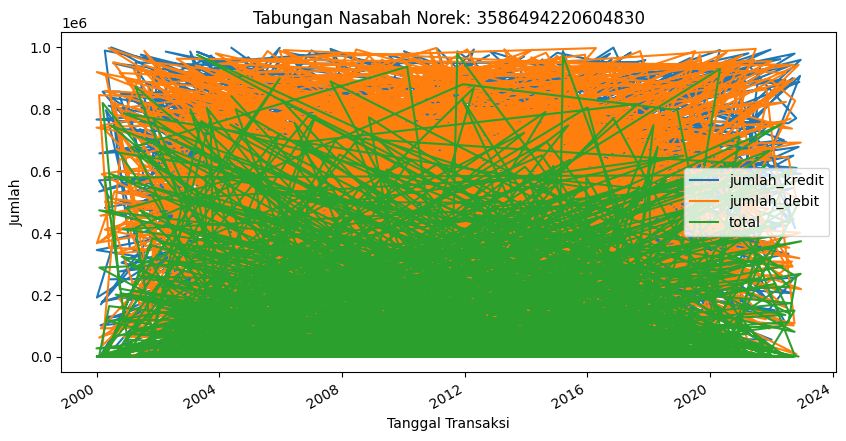

In [43]:
# Periksa tipe data dari setiap kolom
print('Tipe Data:')
print(df_finance_detil_3586494220604830.dtypes)

# Periksa apakah ada nilai NaN atau inf
print('\napakah ada nilai NaN atau inf:')
print(df_finance_detil_3586494220604830.isna().sum())
print((df_finance_detil_3586494220604830 == float('inf')).sum())

# Plot kolom tertentu untuk mengidentifikasi masalah
print('\nGrafik:')
df_finance_detil_3586494220604830.set_index('tgl_transaksi')[['jumlah_kredit', 'jumlah_debit', 'total']].plot(
    figsize=(10, 5),
    title='Tabungan Nasabah Norek: 3586494220604830'
)
plt.ylabel('Jumlah')
plt.xlabel('Tanggal Transaksi')
plt.show()

Report: Berikut diatas adalah laporan rekening data tabungan nasabah norek 3586494220604830 berupa grafik secara keseluruhan

comment: namanya juga sampel data 😅

Agar terlihat lebih rapih, maka oleh karena itulah perlu menggunakan filter data berdasarkan pencarian data berdasarkan tanggal.


Grafik Pencarian Data:


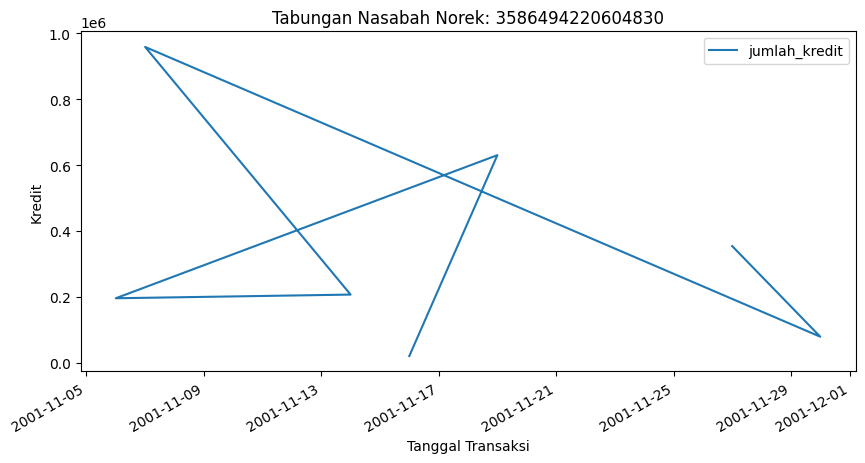

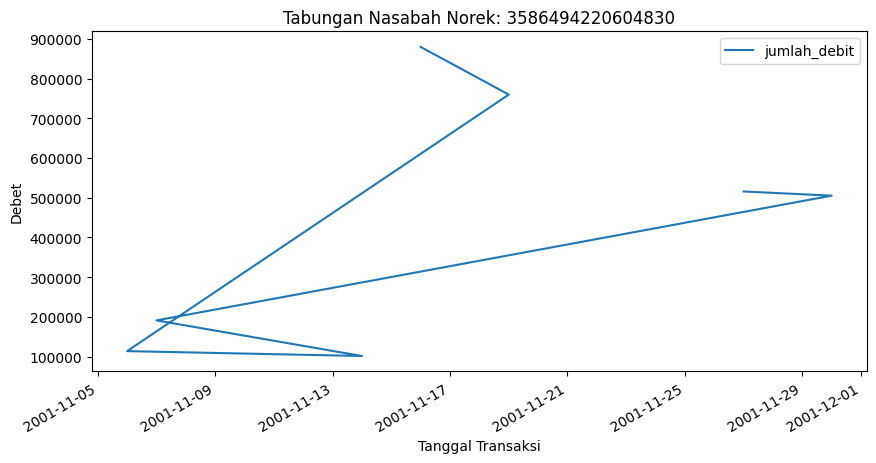

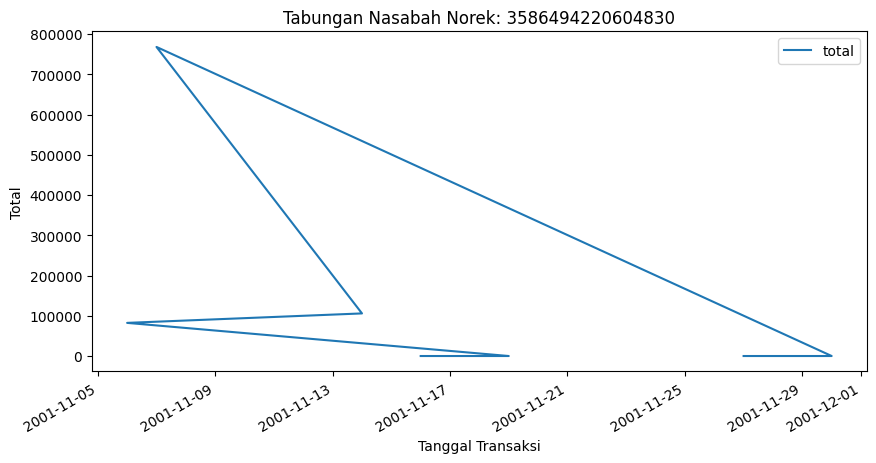

In [56]:
print('\nGrafik Pencarian Data:')
df_finance_detil_filtered_search_date.set_index('tgl_transaksi')[['jumlah_kredit']].plot(
    figsize=(10, 5),
    title='Tabungan Nasabah Norek: 3586494220604830'
)
plt.ylabel('Kredit')
plt.xlabel('Tanggal Transaksi')
plt.show()

df_finance_detil_filtered_search_date.set_index('tgl_transaksi')[['jumlah_debit']].plot(
    figsize=(10, 5),
    title='Tabungan Nasabah Norek: 3586494220604830'
)
plt.ylabel('Debet')
plt.xlabel('Tanggal Transaksi')
plt.show()

df_finance_detil_filtered_search_date.set_index('tgl_transaksi')[['total']].plot(
    figsize=(10, 5),
    title='Tabungan Nasabah Norek: 3586494220604830'
)
plt.ylabel('Total')
plt.xlabel('Tanggal Transaksi')
plt.show()